# Escola Politécnica de Pernambuco ‐ POLI / UPE Pós-Graduação lato sensu

**Especialização em Ciência de Dados e Analytics**

**Disciplina**: Deep Learning

**Docente**: Bruno Fernandes

**Alunos**: Brenda Barros,
Diego Filgueira,
Frederico Bezerra,
José Matheus, 
Wlademir Albuquerque


# **Importando Data**

In [8]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test)=cifar10.load_data()

print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape)) 
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

170498071/170498071 [==============================] - 14s 0us/step
Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


# **Normalizando e  encoding**

In [9]:
from tensorflow.keras.utils import to_categorical

# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Modelo Base**

In [11]:
model1=Sequential()
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
model1.add(Dense(10,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [13]:
history1=model1.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

Epoch 1/20
1563/1563 [==============================] - 16s 5ms/step - loss: 1.5061 - accuracy: 0.4530 - val_loss: 1.2902 - val_accuracy: 0.5401
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1715 - accuracy: 0.5854 - val_loss: 1.1584 - val_accuracy: 0.5931
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0322 - accuracy: 0.6394 - val_loss: 1.0880 - val_accuracy: 0.6211
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9278 - accuracy: 0.6762 - val_loss: 1.0081 - val_accuracy: 0.6505
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8455 - accuracy: 0.7051 - val_loss: 0.9497 - val_accuracy: 0.6735
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7698 - accuracy: 0.7313 - val_loss: 1.0479 - val_accuracy: 0.6532
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7043 - accuracy: 0.7555 - val_loss: 0.9676 - val_accuracy

In [14]:
evaluation = model1.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 1.9053 - accuracy: 0.6613
Test Accuracy: 0.661300003528595


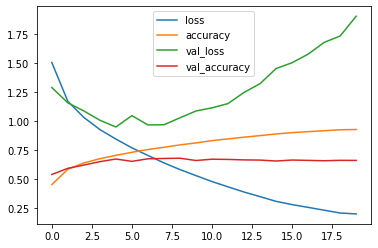

In [15]:
import pandas as pd
pd.DataFrame(history1.history).plot()

#Modelo 2 : add Drop out


In [16]:
model2=Sequential()
model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25)) # Drop 25% of the units from the layer.
model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# training_steps = train_generator.samples//train_generator.batch_size
# validation_steps=test_generator.samples//test_generator.batch_size
# model2.fit_generator(train_generator,epochs=100,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history2=model2.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5457 - accuracy: 0.4381 - val_loss: 1.3161 - val_accuracy: 0.5315
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2563 - accuracy: 0.5533 - val_loss: 1.1958 - val_accuracy: 0.5754
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1387 - accuracy: 0.5969 - val_loss: 1.0488 - val_accuracy: 0.6320
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0468 - accuracy: 0.6334 - val_loss: 1.0078 - val_accuracy: 0.6490
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9794 - accuracy: 0.6558 - val_loss: 0.9520 - val_accuracy: 0.6704
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9198 - accuracy: 0.6755 - val_loss: 0.9306 - val_accuracy: 0.6857
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8773 - accuracy: 0.6912 - val_loss: 0.8976 - val_accuracy:

In [17]:
evaluation = model2.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.9215 - accuracy: 0.7065
Test Accuracy: 0.7064999938011169


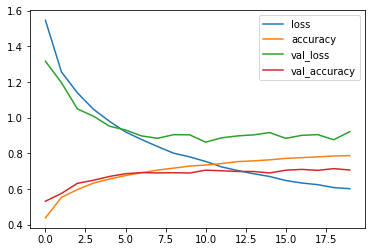

In [18]:
pd.DataFrame(history2.history).plot()


#Modelo 3 : Adicionar mais camadas com mais filtros.


In [19]:
model3 = Sequential()
model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)))
model3.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.4))


model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model3.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.4))

model3.add(Flatten())

model3.add(Dense(units = 1024, activation = 'relu'))

model3.add(Dense(units = 1024, activation = 'relu'))

model3.add(Dense(units = 10, activation = 'softmax'))
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history3=model3.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat)) 

Epoch 1/50
1563/1563 [==============================] - 14s 8ms/step - loss: 1.5786 - accuracy: 0.4168 - val_loss: 1.2441 - val_accuracy: 0.5564
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1956 - accuracy: 0.5762 - val_loss: 1.0317 - val_accuracy: 0.6334
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0324 - accuracy: 0.6350 - val_loss: 0.9862 - val_accuracy: 0.6488
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9142 - accuracy: 0.6770 - val_loss: 0.8338 - val_accuracy: 0.7048
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8369 - accuracy: 0.7052 - val_loss: 0.8122 - val_accuracy: 0.7201
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7789 - accuracy: 0.7269 - val_loss: 0.8015 - val_accuracy: 0.7242
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7304 - accuracy: 0.7433 - val_loss: 0.7367 - val_ac

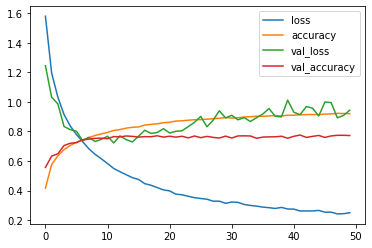

In [20]:
pd.DataFrame(history3.history).plot()

In [21]:
evaluation = model3.evaluate(x_test, y_test_cat)
print ('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.9436 - accuracy: 0.7723
Test Accuracy: 0.7723000049591064


# Modelo 4: adicionando mais camadas e filtros com Dropout

In [22]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.2))
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.3))
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(MaxPool2D((2, 2)))
model4.add(Dropout(0.4))
model4.add(Flatten())
model4.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))
# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model4.fit_generator(train_generator,epochs=100,steps_per_epoch=training_steps,validation_data=test_generator,validation_steps=validation_steps,callbacks=[board])
history4=model4.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))

Epoch 1/50
1563/1563 [==============================] - 11s 6ms/step - loss: 1.7564 - accuracy: 0.3447 - val_loss: 1.3492 - val_accuracy: 0.5158
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3176 - accuracy: 0.5275 - val_loss: 1.0727 - val_accuracy: 0.6114
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1392 - accuracy: 0.5945 - val_loss: 0.9758 - val_accuracy: 0.6566
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0450 - accuracy: 0.6321 - val_loss: 0.9136 - val_accuracy: 0.6769
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9833 - accuracy: 0.6567 - val_loss: 0.8583 - val_accuracy: 0.6965
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9275 - accuracy: 0.6773 - val_loss: 0.8191 - val_accuracy: 0.7144
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8900 - accuracy: 0.6910 - val_loss: 0.7830 - val_accu

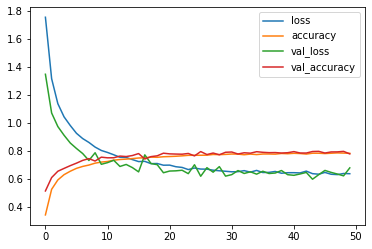

In [23]:
pd.DataFrame(history4.history).plot()

In [24]:
evaluation = model4.evaluate(x_test, y_test_cat)
print ('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.6807 - accuracy: 0.7804
Test Accuracy: 0.7803999781608582


#Modelo 5: adicionando Batch Normalization

In [25]:
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model5.add(BatchNormalization())
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.2))
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.3))
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPool2D((2, 2)))
model5.add(Dropout(0.4))
model5.add(Flatten())
model5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(10, activation='softmax'))
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history5=model5.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6125 - accuracy: 0.4391 - val_loss: 1.1138 - val_accuracy: 0.6043
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0928 - accuracy: 0.6156 - val_loss: 0.8948 - val_accuracy: 0.6832
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9097 - accuracy: 0.6817 - val_loss: 0.7934 - val_accuracy: 0.7227
Epoch 4/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8062 - accuracy: 0.7216 - val_loss: 0.7387 - val_accuracy: 0.7511
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7286 - accuracy: 0.7493 - val_loss: 0.6394 - val_accuracy: 0.7778
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6672 - accuracy: 0.7720 - val_loss: 0.5736 - val_accuracy: 0.8007
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6232 - accuracy: 0.7851 - val_loss: 0.6190 - val_ac

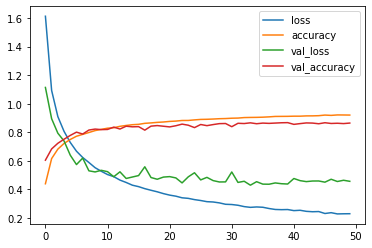

In [26]:
pd.DataFrame(history5.history).plot()

In [27]:
evaluation = model5.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.4563 - accuracy: 0.8643
Test Accuracy: 0.864300012588501


# Modelo 6: adicionando mais camadas com Dropout e Batch Normalization

In [28]:
model6 = Sequential()
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model6.add(BatchNormalization())
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPool2D((2, 2)))
model6.add(Dropout(0.2))

model6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPool2D((2, 2)))
model6.add(Dropout(0.3))

model6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPool2D((2, 2)))
model6.add(Dropout(0.4))


model6.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPool2D((2, 2)))
model6.add(Dropout(0.3))

model6.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.4))


model6.add(Flatten())
model6.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))
model6.add(Dense(10, activation='softmax'))

model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history5=model6.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))

Epoch 1/50
1563/1563 [==============================] - 24s 14ms/step - loss: 1.7325 - accuracy: 0.3931 - val_loss: 1.2386 - val_accuracy: 0.5512
Epoch 2/50
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1672 - accuracy: 0.5896 - val_loss: 1.0026 - val_accuracy: 0.6512
Epoch 3/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9584 - accuracy: 0.6704 - val_loss: 0.8175 - val_accuracy: 0.7186
Epoch 4/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8317 - accuracy: 0.7209 - val_loss: 0.6855 - val_accuracy: 0.7607
Epoch 5/50
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7394 - accuracy: 0.7536 - val_loss: 0.5936 - val_accuracy: 0.7990
Epoch 6/50
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6654 - accuracy: 0.7797 - val_loss: 0.6190 - val_accuracy: 0.7910
Epoch 7/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6172 - accuracy: 0.7966 - val_loss: 0.5744 -

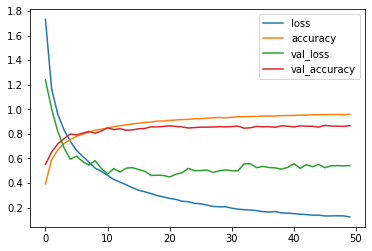

In [29]:
pd.DataFrame(history5.history).plot()

In [30]:
evaluation = model6.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.5418 - accuracy: 0.8661
Test Accuracy: 0.866100013256073


#Modelo 7: adicionando Image Augmentation

In [31]:
model7 = Sequential()
model7.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model7.add(BatchNormalization())
model7.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPool2D((2, 2)))
model7.add(Dropout(0.2))

model7.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model7.add(BatchNormalization())
model7.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPool2D((2, 2)))
model7.add(Dropout(0.3))

model7.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model7.add(BatchNormalization())
model7.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPool2D((2, 2)))
model7.add(Dropout(0.4))


model7.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model7.add(BatchNormalization())
model7.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPool2D((2, 2)))
model7.add(Dropout(0.3))

model7.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model7.add(BatchNormalization())
model7.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model7.add(BatchNormalization())
model7.add(MaxPooling2D((2, 2)))
model7.add(Dropout(0.4))


model7.add(Flatten())
model7.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))
model7.add(Dense(10, activation='softmax'))

model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,rotation_range=20)
it_train = datagen.flow(x_train,y_train_cat)
steps = int(x_train.shape[0] / 64)
history7=model7.fit_generator(it_train,epochs=200,steps_per_epoch=steps,validation_data=(x_test,y_test_cat))



Epoch 1/200


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


781/781 [==============================] - 21s 25ms/step - loss: 2.1303 - accuracy: 0.2683 - val_loss: 1.7063 - val_accuracy: 0.3954
Epoch 2/200
781/781 [==============================] - 18s 23ms/step - loss: 1.5831 - accuracy: 0.4282 - val_loss: 1.5488 - val_accuracy: 0.4719
Epoch 3/200
781/781 [==============================] - 18s 23ms/step - loss: 1.3958 - accuracy: 0.5032 - val_loss: 1.5554 - val_accuracy: 0.5104
Epoch 4/200
781/781 [==============================] - 18s 23ms/step - loss: 1.2761 - accuracy: 0.5514 - val_loss: 1.1623 - val_accuracy: 0.5995
Epoch 5/200
781/781 [==============================] - 19s 25ms/step - loss: 1.1818 - accuracy: 0.5874 - val_loss: 1.1620 - val_accuracy: 0.6120
Epoch 6/200
781/781 [==============================] - 18s 23ms/step - loss: 1.1043 - accuracy: 0.6193 - val_loss: 1.0428 - val_accuracy: 0.6501
Epoch 7/200
781/781 [==============================] - 19s 24ms/step - loss: 1.0473 - accuracy: 0.6451 - val_loss: 0.8674 - val_accuracy: 0.70

acuracia de 89,70%